# Exploratory Data Analysis (EDA) - Spotify Dataset
## Análisis exploratorio de datos: estadísticas, gráficos y patrones iniciales

## 1. Importar librerías necesarias

In [2]:
# Librerías para manipulación y análisis de datos
import pandas as pd
import numpy as np

# Librerías para visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de visualización para gráficos más atractivos
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

# Suprimir advertencias para salida más limpia
import warnings
warnings.filterwarnings('ignore')

print("Librerías importadas exitosamente")

Librerías importadas exitosamente


## 2. Cargar y explorar el dataset

In [4]:
# Cargar el dataset desde el archivo CSV
df = pd.read_csv('dataset.csv')

print(f"Dimensiones: {df.shape[0]:,} filas × {df.shape[1]} columnas")
print("\nPrimeras 5 filas del dataset:")
df.head()

Dimensiones: 114,000 filas × 21 columnas

Primeras 5 filas del dataset:


,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [ ]:
#Información general del dataset: tipos de datos, valores no nulos
print("Informacion general del dataset")
print("="*80)
df.info()
print("\n" + "="*80)

INFORMACIÓN GENERAL DEL DATASET
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  f

In [6]:
# Análisis de valores faltantes
print("ANÁLISIS DE VALORES FALTANTES")
print("="*80)

missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100

missing_df = pd.DataFrame({
    'Columna': missing_values.index,
    'Valores Faltantes': missing_values.values,
    'Porcentaje (%)': missing_percent.values
})

# Mostrar solo columnas con valores faltantes
missing_df = missing_df[missing_df['Valores Faltantes'] > 0]

if len(missing_df) > 0:
    print(missing_df.to_string(index=False))
else:
    print("✓ No hay valores faltantes en el dataset")

print("\n" + "="*80)

ANÁLISIS DE VALORES FALTANTES
   Columna  Valores Faltantes  Porcentaje (%)
   artists                  1        0.000877
album_name                  1        0.000877
track_name                  1        0.000877



In [28]:
# Análisis de duplicados
print("ANÁLISIS DE DUPLICADOS")
print("="*80)

duplicates_total = df.duplicated().sum()
duplicates_track_id = df.duplicated(subset=['track_id']).sum()

print(f"Filas completamente duplicadas: {duplicates_total:,}")
print(f"Canciones duplicadas (mismo track_id): {duplicates_track_id:,}")

if duplicates_track_id > 0:
    print(f"\n⚠ Hay {duplicates_track_id:,} canciones repetidas en el dataset")
else:
    print("\n✓ No hay canciones duplicadas")

print("\n" + "="*80)

ANÁLISIS DE DUPLICADOS
Filas completamente duplicadas: 0
Canciones duplicadas (mismo track_id): 24,259

⚠ Hay 24,259 canciones repetidas en el dataset



## 3. Estadísticas descriptivas

In [27]:
# Estadísticas descriptivas de las variables numéricas
print("ESTADÍSTICAS DESCRIPTIVAS - Variables Numéricas")
print("="*80)

# Seleccionar solo columnas numéricas relevantes
numeric_cols = ['popularity', 'duration_ms', 'danceability', 'energy', 'loudness', 
                'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

desc_stats = df[numeric_cols].describe()
print(desc_stats.T)  # Transpuesto para mejor lectura
print("\n" + "="*80)

ESTADÍSTICAS DESCRIPTIVAS - Variables Numéricas
                     count           mean            std     min  \
popularity        114000.0      33.238535      22.305078   0.000   
duration_ms       114000.0  228029.153114  107297.712645   0.000   
danceability      114000.0       0.566800       0.173542   0.000   
energy            114000.0       0.641383       0.251529   0.000   
loudness          114000.0      -8.258960       5.029337 -49.531   
speechiness       114000.0       0.084652       0.105732   0.000   
acousticness      114000.0       0.314910       0.332523   0.000   
instrumentalness  114000.0       0.156050       0.309555   0.000   
liveness          114000.0       0.213553       0.190378   0.000   
valence           114000.0       0.474068       0.259261   0.000   
tempo             114000.0     122.147837      29.978197   0.000   

                           25%            50%          75%          max  
popularity            17.00000      35.000000      50.0000   

In [8]:
# Análisis de variables categóricas
print("ANÁLISIS DE VARIABLES CATEGÓRICAS")
print("="*80)

# Número de géneros únicos
n_genres = df['track_genre'].nunique()
print(f"\nNúmero de géneros únicos: {n_genres}")

# Top 10 géneros más frecuentes
print("\nTop 10 géneros más frecuentes:")
top_genres = df['track_genre'].value_counts().head(10)
for genre, count in top_genres.items():
    print(f"  {genre:25s}: {count:,} canciones ({count/len(df)*100:.1f}%)")

# Número de artistas únicos
n_artists = df['artists'].nunique()
print(f"\nNúmero de artistas únicos: {n_artists:,}")

# Canciones explícitas vs no explícitas
print("\nCanciones explícitas:")
explicit_counts = df['explicit'].value_counts()
print(f"  No explícitas: {explicit_counts.get(False, 0):,} ({explicit_counts.get(False, 0)/len(df)*100:.1f}%)")
print(f"  Explícitas:    {explicit_counts.get(True, 0):,} ({explicit_counts.get(True, 0)/len(df)*100:.1f}%)")

print("\n" + "="*80)

ANÁLISIS DE VARIABLES CATEGÓRICAS

Número de géneros únicos: 114

Top 10 géneros más frecuentes:
  acoustic                 : 1,000 canciones (0.9%)
  afrobeat                 : 1,000 canciones (0.9%)
  alt-rock                 : 1,000 canciones (0.9%)
  alternative              : 1,000 canciones (0.9%)
  ambient                  : 1,000 canciones (0.9%)
  anime                    : 1,000 canciones (0.9%)
  black-metal              : 1,000 canciones (0.9%)
  bluegrass                : 1,000 canciones (0.9%)
  blues                    : 1,000 canciones (0.9%)
  brazil                   : 1,000 canciones (0.9%)

Número de artistas únicos: 31,437

Canciones explícitas:
  No explícitas: 104,253 (91.5%)
  Explícitas:    9,747 (8.6%)



## 4. Visualización de distribuciones - Variables de audio

In [1]:
#Distribuciones de las principales características de audio
audio_features = ['danceability', 'energy', 'speechiness', 'acousticness', 
                  'instrumentalness', 'liveness', 'valence', 'duration_ms']

fig, axes = plt.subplots(3, 3, figsize=(15, 12))
fig.suptitle('Distribución de Características de Audio (0-1 scale)', fontsize=16, fontweight='bold')

for idx, feature in enumerate(audio_features):
    row = idx // 3
    col = idx % 3
    
    #Histograma con curva de densidad
    axes[row, col].hist(df[feature], bins=50, alpha=0.7, edgecolor='black', density=True)
    df[feature].plot(kind='kde', ax=axes[row, col], color='red', linewidth=2)
    
    axes[row, col].set_xlabel(feature.capitalize(), fontsize=10)
    axes[row, col].set_ylabel('Densidad', fontsize=10)
    axes[row, col].set_title(f'{feature.capitalize()}', fontsize=11, fontweight='bold')
    axes[row, col].grid(True, alpha=0.3)
    
    #Añadir estadísticas en el gráfico
    mean_val = df[feature].mean()
    median_val = df[feature].median()
    axes[row, col].axvline(mean_val, color='green', linestyle='--', linewidth=1, label=f'Media: {mean_val:.2f}')
    axes[row, col].axvline(median_val, color='orange', linestyle='--', linewidth=1, label=f'Mediana: {median_val:.2f}')
    axes[row, col].legend(fontsize=8)

#Eliminar subplots vacíos
for idx in range(len(audio_features), 9):
    row = idx // 3
    col = idx % 3
    fig.delaxes(axes[row, col])

plt.tight_layout()
plt.show()

NameError: name 'plt' is not defined

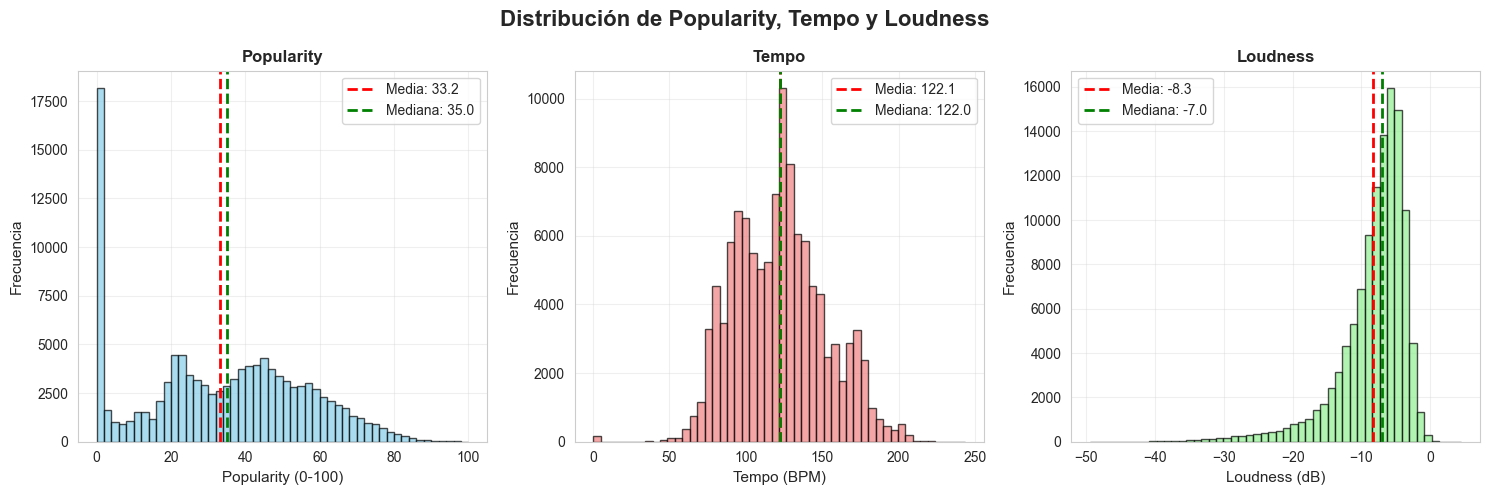

In [10]:
# Distribución de Popularity, Tempo y Loudness
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Distribución de Popularity, Tempo y Loudness', fontsize=16, fontweight='bold')

# Popularity
axes[0].hist(df['popularity'], bins=50, alpha=0.7, edgecolor='black', color='skyblue')
axes[0].set_xlabel('Popularity (0-100)', fontsize=11)
axes[0].set_ylabel('Frecuencia', fontsize=11)
axes[0].set_title('Popularity', fontsize=12, fontweight='bold')
axes[0].axvline(df['popularity'].mean(), color='red', linestyle='--', linewidth=2, label=f"Media: {df['popularity'].mean():.1f}")
axes[0].axvline(df['popularity'].median(), color='green', linestyle='--', linewidth=2, label=f"Mediana: {df['popularity'].median():.1f}")
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Tempo
axes[1].hist(df['tempo'], bins=50, alpha=0.7, edgecolor='black', color='lightcoral')
axes[1].set_xlabel('Tempo (BPM)', fontsize=11)
axes[1].set_ylabel('Frecuencia', fontsize=11)
axes[1].set_title('Tempo', fontsize=12, fontweight='bold')
axes[1].axvline(df['tempo'].mean(), color='red', linestyle='--', linewidth=2, label=f"Media: {df['tempo'].mean():.1f}")
axes[1].axvline(df['tempo'].median(), color='green', linestyle='--', linewidth=2, label=f"Mediana: {df['tempo'].median():.1f}")
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# Loudness
axes[2].hist(df['loudness'], bins=50, alpha=0.7, edgecolor='black', color='lightgreen')
axes[2].set_xlabel('Loudness (dB)', fontsize=11)
axes[2].set_ylabel('Frecuencia', fontsize=11)
axes[2].set_title('Loudness', fontsize=12, fontweight='bold')
axes[2].axvline(df['loudness'].mean(), color='red', linestyle='--', linewidth=2, label=f"Media: {df['loudness'].mean():.1f}")
axes[2].axvline(df['loudness'].median(), color='green', linestyle='--', linewidth=2, label=f"Mediana: {df['loudness'].median():.1f}")
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
# Información general del dataset: tipos de datos, valores no nulos
print("INFORMACIÓN GENERAL DEL DATASET")
print("="*80)
df.info()
print("\n" + "="*80)

INFORMACIÓN GENERAL DEL DATASET
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  f

## 5. Análisis de correlaciones

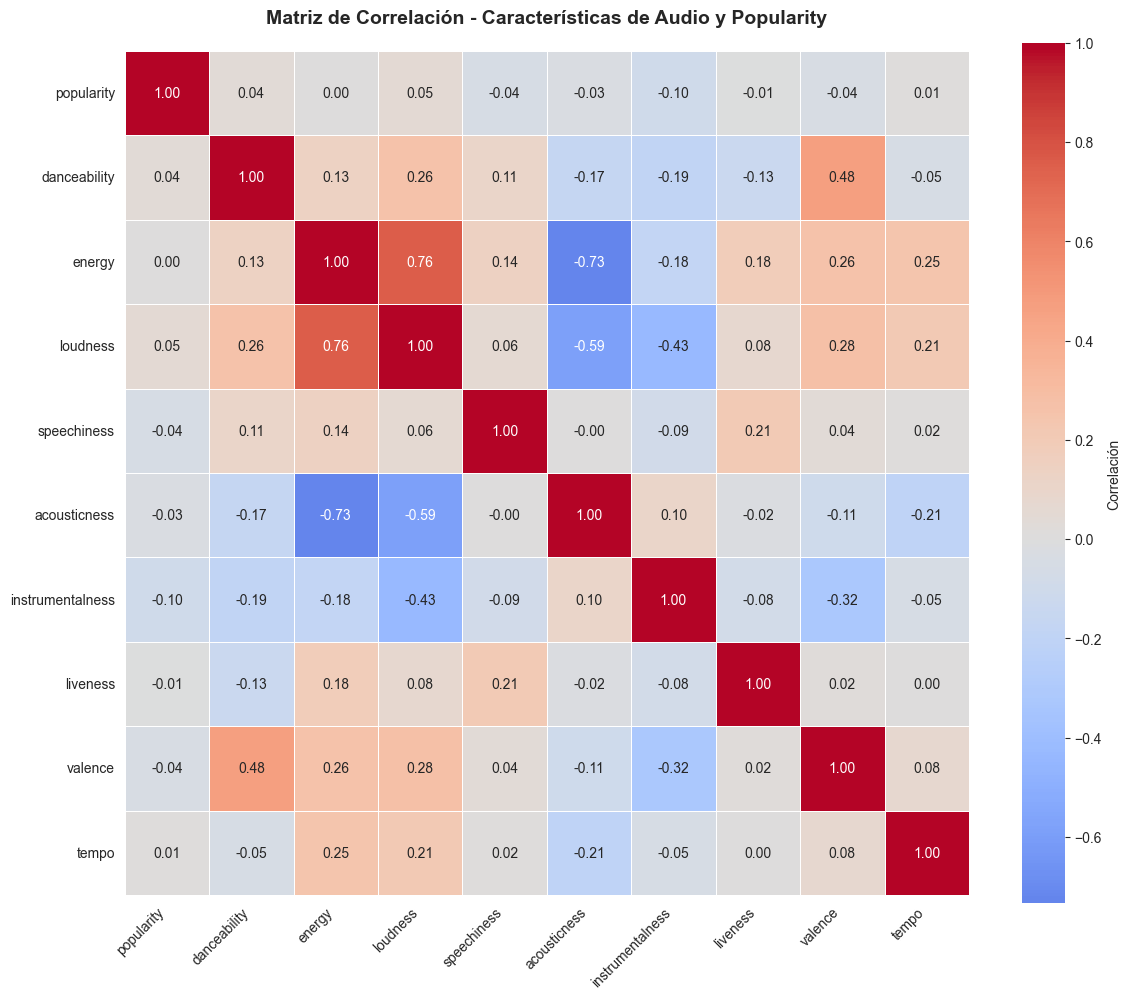


Interpretación del mapa de calor:
  • Valores cercanos a +1 (rojo): correlación positiva fuerte
  • Valores cercanos a -1 (azul): correlación negativa fuerte
  • Valores cercanos a 0 (blanco): sin correlación


In [ ]:
# Matriz de correlación entre variables numéricas
# Esto ayuda a identificar relaciones entre características

correlation_features = ['popularity', 'danceability', 'energy', 'loudness', 'speechiness',
                        'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

correlation_matrix = df[correlation_features].corr()

# Crear mapa de calor de correlaciones
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, 
            annot=True,          # Mostrar valores
            fmt='.2f',           # Formato de 2 decimales
            cmap='coolwarm',     # Esquema de colores: azul (negativo) a rojo (positivo)
            center=0,            # Centrar en 0
            square=True,         # Celdas cuadradas
            linewidths=0.5,
            cbar_kws={'label': 'Correlación'})

plt.title('Matriz de Correlación - Características de Audio y Popularity', fontsize=14, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

print("\nInterpretación del mapa de calor:")

## 6. Análisis de outliers (valores atípicos)

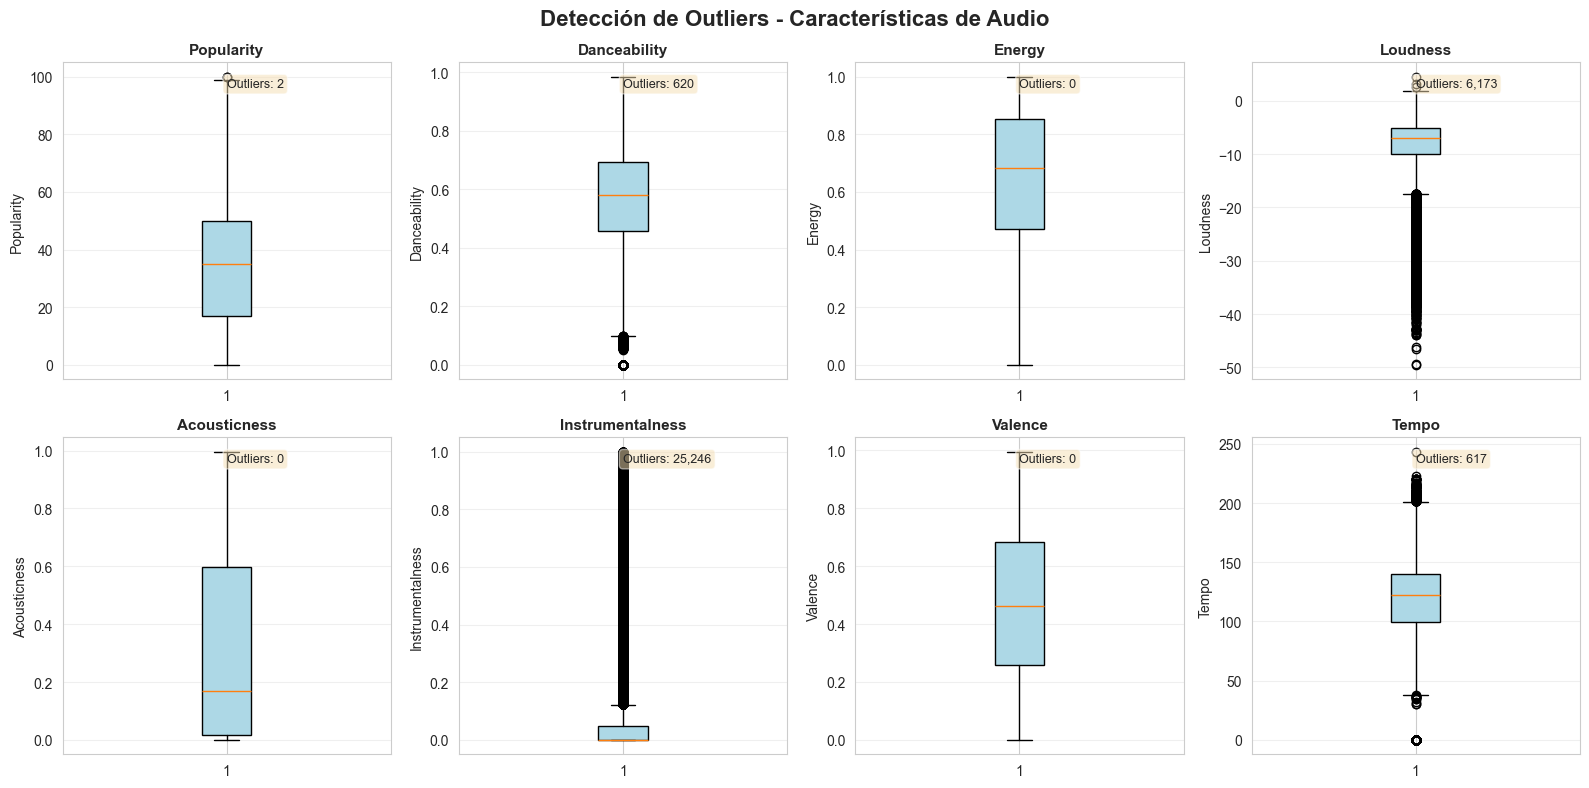

Los puntos fuera de los 'bigotes' del box plot son outliers.
Outliers no son necesariamente errores - pueden ser canciones genuinamente únicas.


In [ ]:
# Box plots para detectar outliers en características de audio
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
fig.suptitle('Detección de Outliers - Características de Audio', fontsize=16, fontweight='bold')

features_for_outliers = ['popularity', 'danceability', 'energy', 'loudness', 
                         'acousticness', 'instrumentalness', 'valence', 'tempo']

for idx, feature in enumerate(features_for_outliers):
    row = idx // 4
    col = idx % 4
    
    # Crear box plot
    bp = axes[row, col].boxplot(df[feature], vert=True, patch_artist=True)
    bp['boxes'][0].set_facecolor('lightblue')
    bp['boxes'][0].set_edgecolor('black')
    
    axes[row, col].set_ylabel(feature.capitalize(), fontsize=10)
    axes[row, col].set_title(feature.capitalize(), fontsize=11, fontweight='bold')
    axes[row, col].grid(True, alpha=0.3, axis='y')
    
    # Calcular y mostrar número de outliers
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[feature] < Q1 - 1.5*IQR) | (df[feature] > Q3 + 1.5*IQR)]
    
    axes[row, col].text(0.5, 0.95, f'Outliers: {len(outliers):,}', 
                        transform=axes[row, col].transAxes,
                        fontsize=9, verticalalignment='top',
                        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()
